# Capstone: Kpop Group Lifespan Analysis

### Overall Contents:
- Background
- Data Cleaning
- Exploratory Data Analysis
- [Modeling](#4.-Modeling) **(In this notebook)**
- Evaluation
- Conclusion and Recommendation

### Data Dictionary



## Modeling

As this project aims to develop a model that....

## 4. Modeling: Logistic Regression

### 4.1 Libraries Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 4.2 Data Import

In [2]:
# Import data of train_df_model and test_df_model
train_df = pd.read_csv('../data/disband_train.csv')
test_df = pd.read_csv("../data/active_test.csv")

In [3]:
train_df.head()

,group_name,company,group_type,debut_year,disband_year,social_accounts,inactive_members,current_members,original_members_remainding,initial_members,...,other_singles,foreign_albums,foreign_mini_albums,foreign_other_album,foreign_singles,foreign_digital_singles,others,last_production_year,total_releases,lifespan
0,10X10,gaon_entertainment,0,2015,2016,2,0,6,6,6,...,0,0,0,0,0,0,0,2016,3,2
1,1NB,trivus_entertainment,0,2017,2018,4,0,5,5,5,...,0,0,0,0,0,0,0,2018,6,2
2,1PS,maroo_entertainment,0,2014,2015,3,0,5,4,4,...,0,0,0,0,0,0,1,2014,2,2
3,2EYES,sidushq,0,2013,2017,2,0,4,4,5,...,0,0,0,0,0,0,1,2015,2,5
4,2NE1,yg_entertainment,0,2009,2017,5,0,3,3,4,...,0,2,1,0,2,2,1,2017,26,9


In [4]:
test_df.head()

,group_name,company,group_type,debut_year,disband_year,social_accounts,inactive_members,current_members,original_members_remainding,initial_members,...,digital_singles,other_singles,foreign_albums,foreign_mini_albums,foreign_other_album,foreign_singles,foreign_digital_singles,others,last_production_year,total_releases
0,(G)I-DLE,cube_entertainment,0,2018,0,10,1,5,5,6,...,4,0,0,2,0,2,2,5,2021,20
1,3YE,gh_entertainment,0,2019,0,5,0,3,3,3,...,4,1,0,0,0,0,0,0,2021,6
2,4CARAT,youngbridge_entertainment,0,2019,0,1,0,3,3,4,...,2,0,0,0,0,0,0,0,2020,2
3,A-Daily,dk_entertainment,0,2014,0,4,0,2,2,6,...,3,0,0,0,0,0,0,1,2017,5
4,A-Feel,sa_entertainment,0,2019,0,2,0,4,4,4,...,1,0,0,0,0,0,0,0,2019,1


### 4.3 Set the X and y variable

In [5]:
X = train_df.drop(labels = ['group_name','company','disband_year','foreign_digital_singles','lifespan','last_production_year'], axis = 1)
y = train_df.lifespan

In [6]:
X_test = test_df.drop(labels = ['group_name','company','disband_year','foreign_digital_singles','last_production_year'], axis = 1)

### 4.4 Multicollinearity
As mentioned in our EDA section we suspect that there might be multicollinearity effect present. Therefore we will use a polynomial feature of 2 to model our data as well.

In [7]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly = poly.fit_transform(X)

### 4.4 Split the data into train/val data

In [8]:
# Perform a train, val split on the data on the resampled data (normal)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

# Perform a train, val split on the data on the resampled data (polynomialfeature)
X_poly_train, X_poly_val, y_poly_train, y_poly_val = train_test_split(X_poly, y, test_size=.2, random_state=42)

### 4.5 OLS model

In [9]:
ols = LinearRegression()
ols.fit(X_train, y_train)
# the model score on the training and test data
print(f'R-squared for train is : {ols.score(X_train, y_train)}')
print(f'R-squared for val is : {ols.score(X_val, y_val)}')

R-squared for train is : 0.7922701625378012
R-squared for val is : 0.3487388918081201


In [10]:
ols_pred_train = ols.predict(X_train)
print(f'RMSE for train is : {np.sqrt(metrics.mean_squared_error(y_train, ols_pred_train))}')
ols_pred_val = ols.predict(X_val)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_val, ols_pred_val))}')

RMSE for train is : 1.1677382525219968
RMSE for val is : 2.0457211286739154


In [11]:
ols_poly = LinearRegression()
ols_poly.fit(X_poly_train, y_poly_train)
# the model score on the training and test data
print(f'R-squared for train is : {ols_poly.score(X_poly_train, y_poly_train)}')
print(f'R-squared for val is : {ols_poly.score(X_poly_val, y_poly_val)}')

R-squared for train is : 0.9614940597900172
R-squared for val is : -505.6260081842558


In [12]:
ols_poly_pred_train = ols_poly.predict(X_poly_train)
print(f'RMSE for train is : {np.sqrt(metrics.mean_squared_error(y_poly_train, ols_poly_pred_train))}')
ols_poly_pred_val = ols_poly.predict(X_poly_val)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_poly_val, ols_poly_pred_val))}')

RMSE for train is : 0.5027590910511006
RMSE for val is : 57.05748164684937


We see that although the score is better on the training data, when it come to the test data it performed poorly. Its a classic case of overfitting. Therefore we will be using the normal features to create our model.

### 4.6 Lasso Regression


In [13]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-5, 5, 1000)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv = lasso_cv.fit(X_train, y_train)

In [14]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.05672228971644543

In [15]:
print(f'R-squared for train is : {lasso_cv.score(X_train, y_train)}')
print(f'R-squared for val is : {lasso_cv.score(X_val, y_val)}')

R-squared for train is : 0.7369620756761989
R-squared for val is : 0.7038093009324113


In [16]:
lasso_pred_train = lasso_cv.predict(X_train)
print(f'RMSE for train is : {np.sqrt(metrics.mean_squared_error(y_train, lasso_pred_train))}')
lasso_pred_val = lasso_cv.predict(X_val)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_val, lasso_pred_val))}')

RMSE for train is : 1.3140299098423995
RMSE for val is : 1.379604388285734


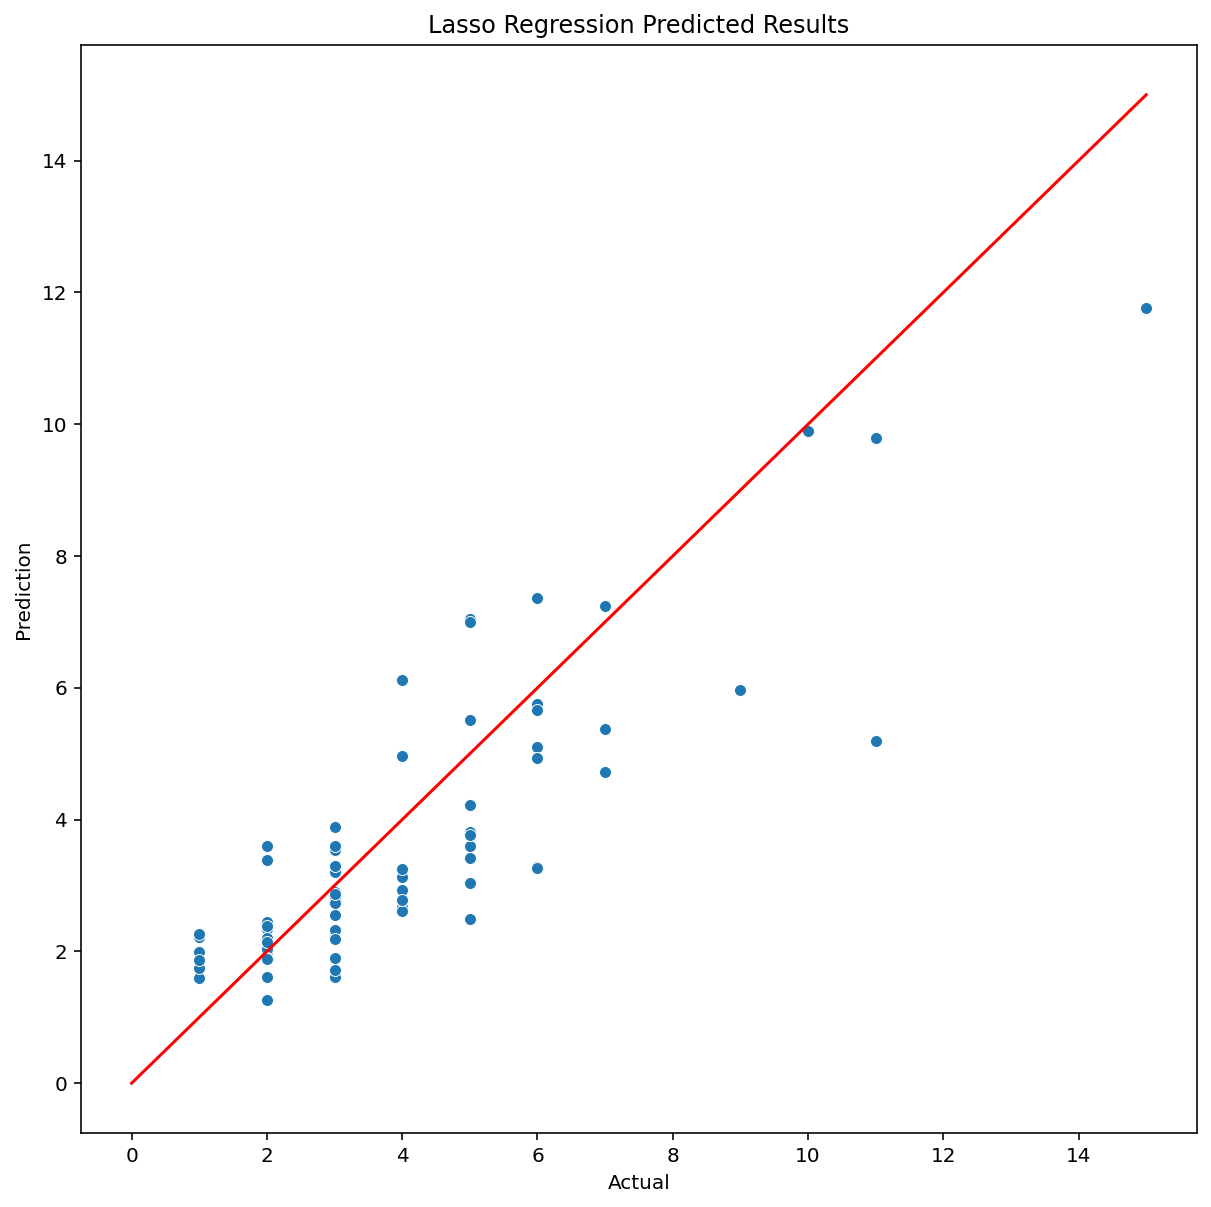

In [17]:
# plot the model
plt.figure(figsize=(10,10))
plt.title("Lasso Regression Predicted Results")
plot = sns.scatterplot(x = y_val, y = lasso_pred_val)
plot.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,15,2)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.savefig("../img/Lasso_Regression.jpg",dpi=1000,bbox_inches='tight')

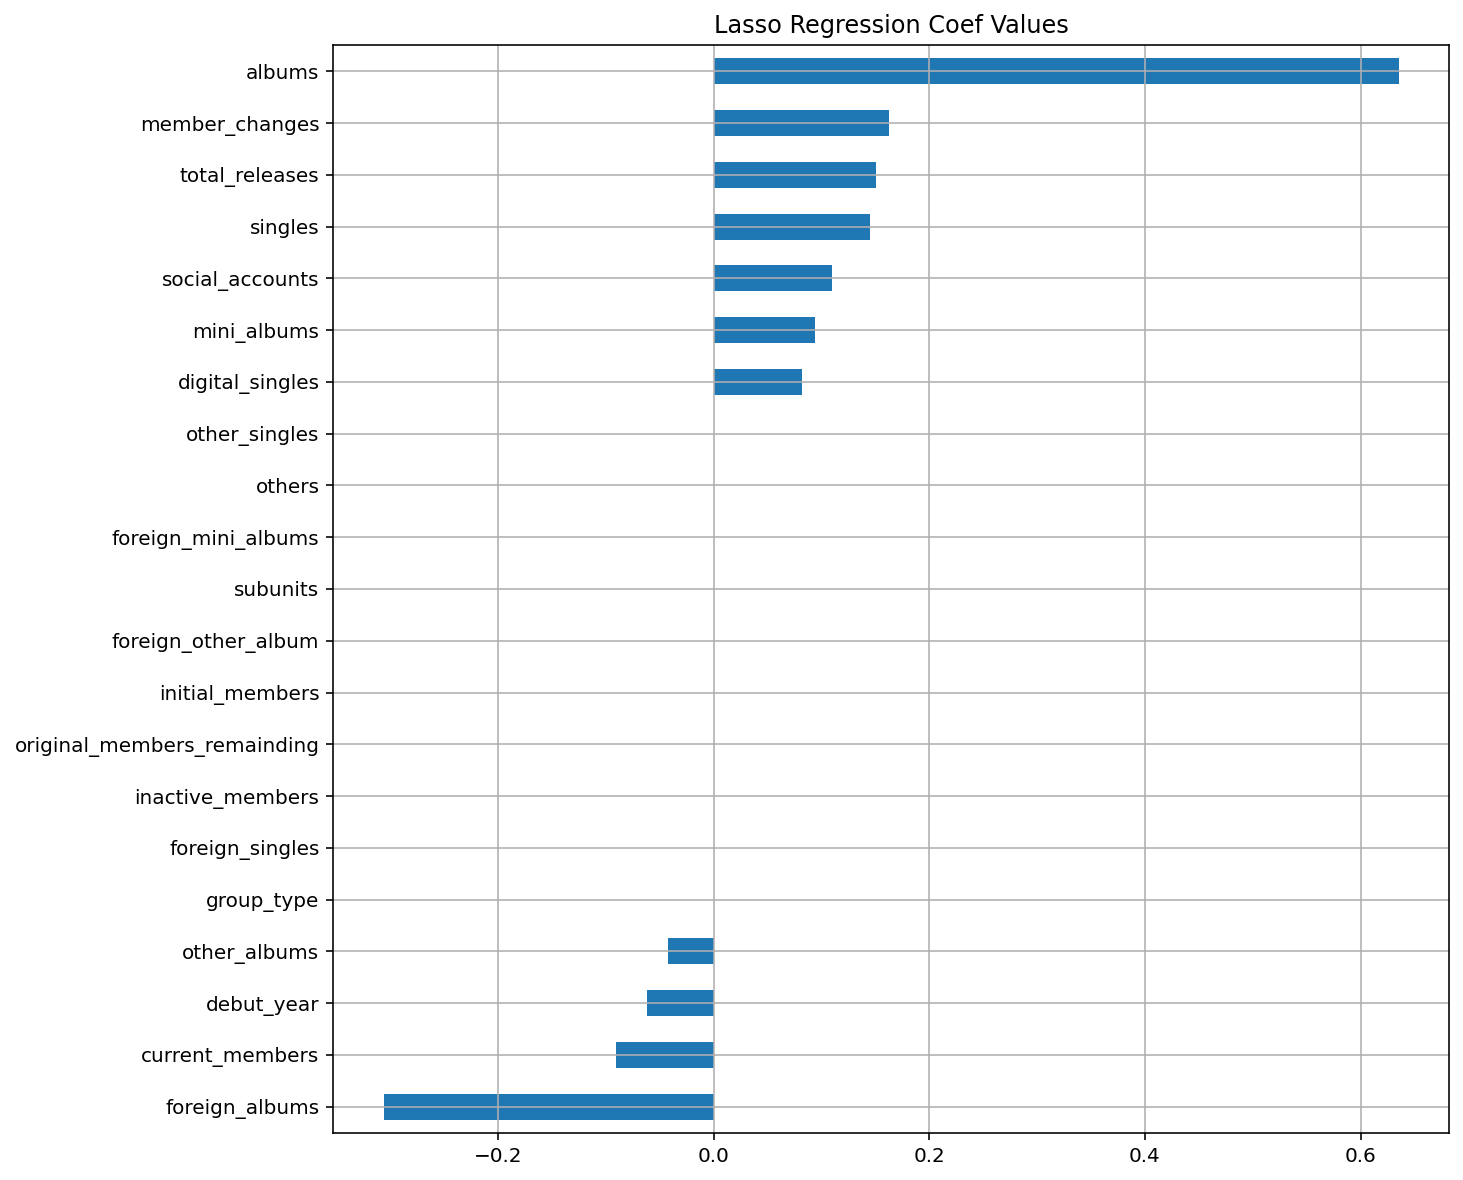

In [18]:
features = X.columns
coef = pd.Series(lasso_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='Lasso Regression Coef Values',figsize=(10,10), grid = True)
plt.savefig("../img/Lasso_Regression_Coef.jpg",dpi=1000,bbox_inches='tight')

### 4.6 Ridge Regression



In [19]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(-5, 5, 1000)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
# Fit model using best ridge alpha!
ridge_cv = ridge_cv.fit(X_train, y_train)

In [20]:
# Here is the optimal value of alpha
ridge_cv.alpha_

161.14142772530198

In [21]:
print(f'R-squared for train is : {ridge_cv.score(X_train, y_train)}')
print(f'R-squared for val is : {ridge_cv.score(X_val, y_val)}')

R-squared for train is : 0.7258099290456316
R-squared for val is : 0.7015643300347976


In [22]:
ridge_pred_train = ridge_cv.predict(X_train)
print(f'RMSE for train is : {np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train))}')
ridge_pred_val = ridge_cv.predict(X_val)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_val, ridge_pred_val))}')

RMSE for train is : 1.341596536131781
RMSE for val is : 1.3848228592093776


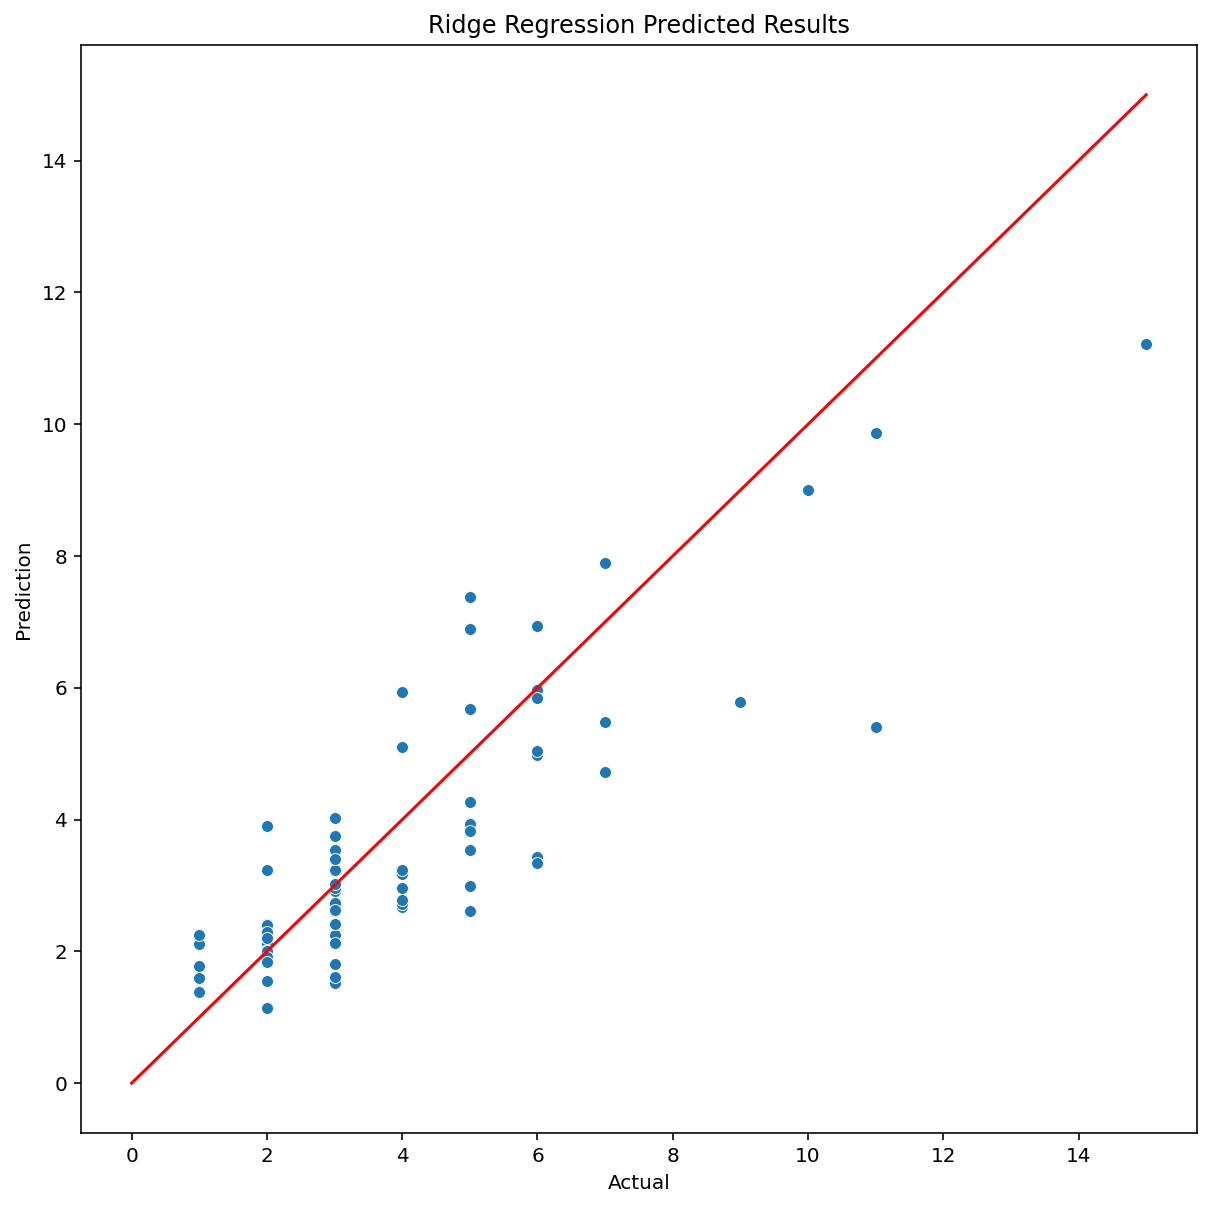

In [23]:
# plot the model
plt.figure(figsize=(10,10))
plt.title("Ridge Regression Predicted Results")
plot = sns.scatterplot(x = y_val, y = ridge_pred_val)
plot.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,15,2)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.savefig("../img/Ridge_Regression.jpg",dpi=1000,bbox_inches='tight')

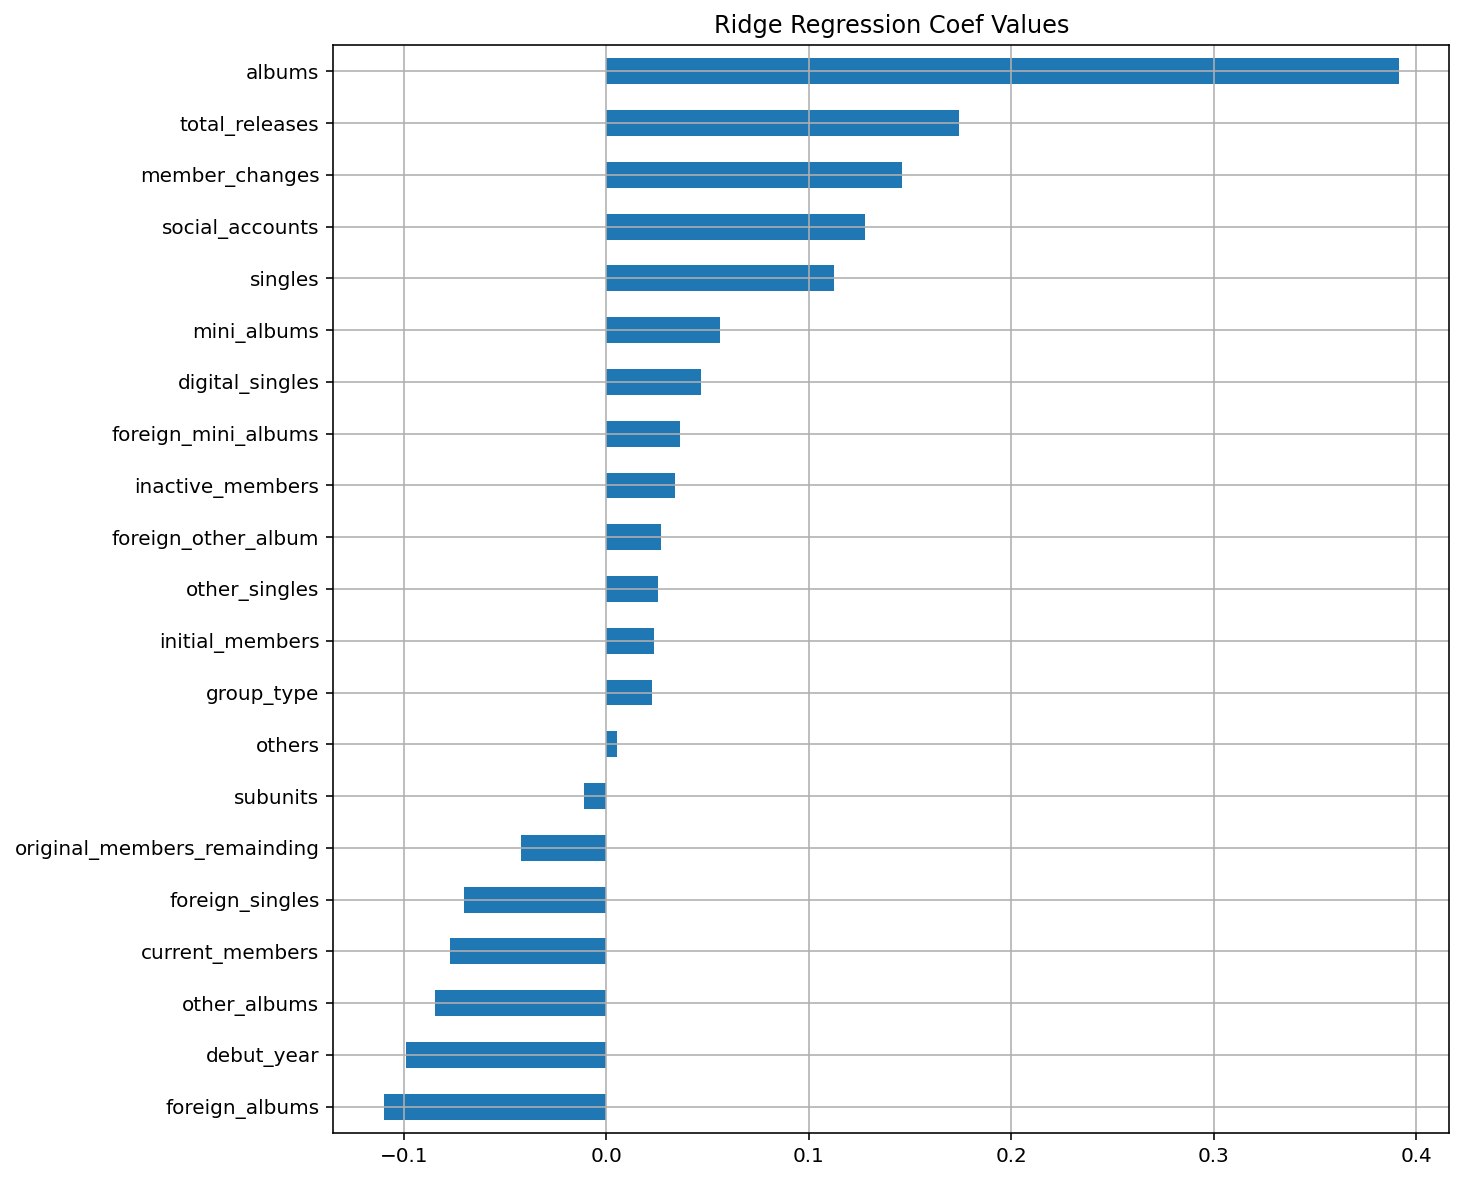

In [24]:
features = X.columns
coef = pd.Series(ridge_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='Ridge Regression Coef Values',figsize=(10,10), grid = True)
plt.savefig("../img/Ridge_Regression_Coef.jpg",dpi=1000,bbox_inches='tight')

### 4.6 ElasticNet Regression (With GridSearch)

In [25]:
pipe_enet_params = {
    'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'alphas': [np.logspace(-1, 1, 1000)],
    'random_state': [42],
}

gs_enet = GridSearchCV(ElasticNetCV(), 
                  param_grid=pipe_enet_params, 
                  cv = 5 , n_jobs = -1) 
gs_enet.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNetCV(), n_jobs=-1,
             param_grid={'alphas': [array([ 0.1       ,  0.10046204,  0.10092622,  0.10139254,  0.10186102,
        0.10233166,  0.10280447,  0.10327947,  0.10375667,  0.10423607,
        0.10471768,  0.10520152,  0.1056876 ,  0.10617592,  0.1066665 ,
        0.10715934,  0.10765446,  0.10815187,  0.10865158,  0.10915359,
        0.10965793,  0.11016459,  0.1106736 ,  0.11118496,  0.11169868,
        0.1...
        8.74866812,  8.78909065,  8.82969996,  8.87049689,  8.91148232,
        8.95265713,  8.99402217,  9.03557835,  9.07732653,  9.1192676 ,
        9.16140246,  9.203732  ,  9.24625712,  9.28897872,  9.33189772,
        9.37501502,  9.41833153,  9.46184819,  9.50556592,  9.54948564,
        9.59360829,  9.6379348 ,  9.68246612,  9.72720319,  9.77214697,
        9.81729841,  9.86265846,  9.9082281 ,  9.95400829, 10.        ])],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                    

In [26]:
print(f'Best Score : {gs_enet.best_score_}')
print(f'Train Score : {gs_enet.score(X_train, y_train)}')
print(f'Test Score : {gs_enet.score(X_val, y_val)}')

gs_enet_results = pd.DataFrame(gs_enet.cv_results_)
gs_enet_results = gs_enet_results.sort_values(by=['mean_test_score'], ascending = False)
gs_enet_results[['param_l1_ratio','mean_test_score']].head()

Best Score : 0.681987581258918
Train Score : 0.7269101238306364
Test Score : 0.7010737589841531


,param_l1_ratio,mean_test_score
1,0.2,0.681988
0,0.1,0.681514
2,0.3,0.680618
4,0.5,0.672416
3,0.4,0.672278


In [27]:
# Generate predictions.
enet_pred_train = gs_enet.predict(X_train)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_train, enet_pred_train))}')
enet_pred_val = gs_enet.predict(X_val)
print(f'RMSE for val is : {np.sqrt(metrics.mean_squared_error(y_val, enet_pred_val))}')

RMSE for val is : 1.3389022351945339
RMSE for val is : 1.385960583551033


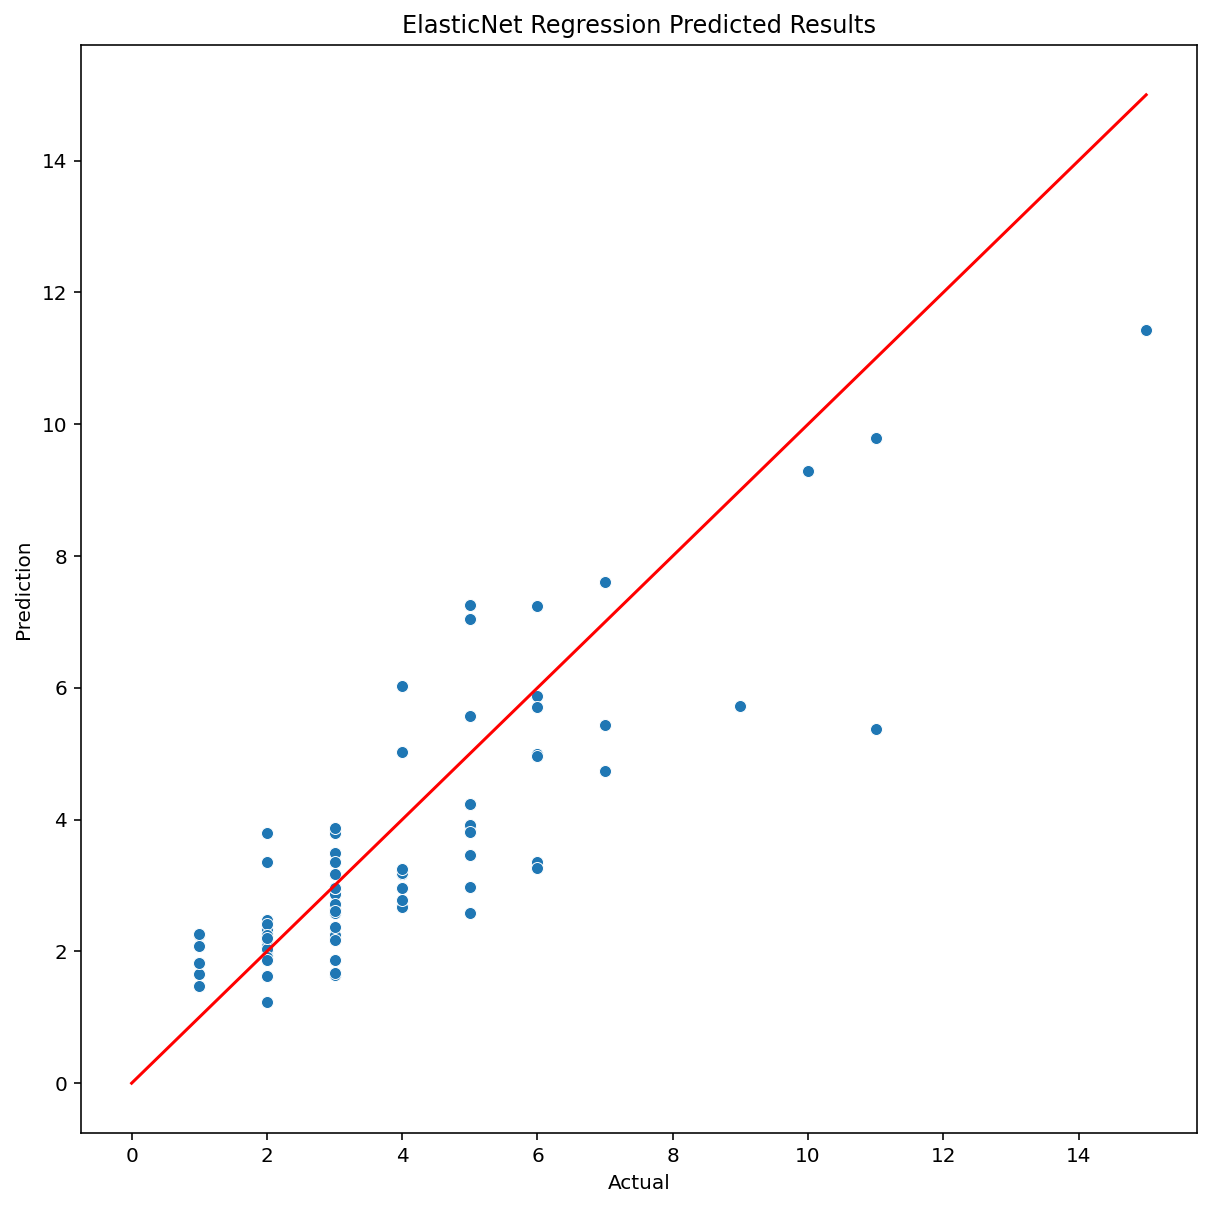

In [28]:
# plot the model
plt.figure(figsize=(10,10))
plt.title("ElasticNet Regression Predicted Results")
plot = sns.scatterplot(x = y_val, y = enet_pred_val)
plot.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,15,2)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.savefig("../img/ElasticNet_Regression.jpg",dpi=1000,bbox_inches='tight')

In [29]:
# Instantiate model.
enet_cv = ElasticNetCV(alphas = gs_enet.best_params_['alphas'], l1_ratio=gs_enet.best_params_['l1_ratio'])
# Fit model using optimal alpha.
enet_cv = enet_cv.fit(X_train, y_train)
# Here is the optimal value of alpha
enet_cv.alpha_

0.2584713507469564

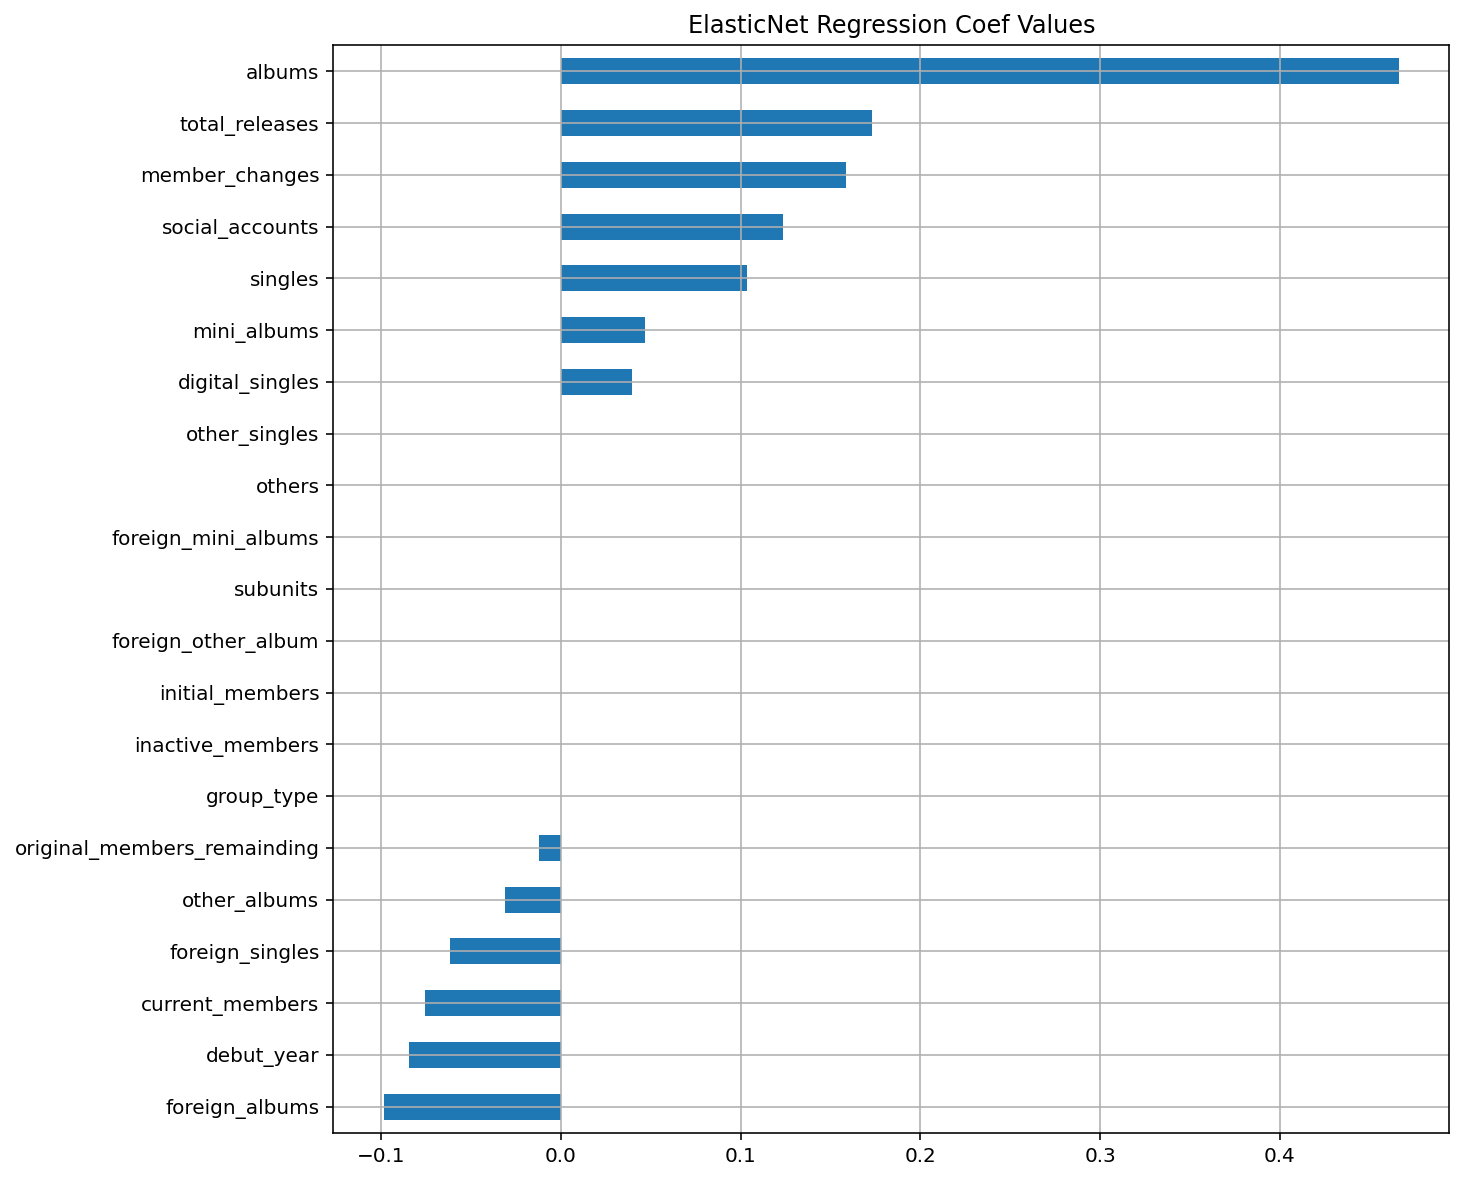

In [30]:
features = X.columns
coef = pd.Series(enet_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='ElasticNet Regression Coef Values',figsize=(10,10), grid = True)
plt.savefig("../img/ElasticNet_Regression_Coef.jpg",dpi=1000,bbox_inches='tight')

### Model Evaluation

**Summary Table: Model Evaluation**

| Model|Train Score (Accuracy)       |   Val Score (Accuracy)   | Train RMSE |  Val RMSE |
|:-------------------:|:-------------------:|:-------:|:----------:|:-----------------:|
| OLS |  0.792 |    0.348  |     1.168    |      2.046     |
|Lasso regression| 0.736 |  0.703  | 1.314 |   1.380  |
|Ridge regression| 0.726 |  0.702  | 1.342 |   1.385  |
|Enet regression(best)| 0.727 |  0.701  | 1.338 |   1.385  |

In [34]:
lasso_pred_test = lasso_cv.predict(X_test)
test_df['lifespan'] = pd.DataFrame(lasso_pred_test)
test_df['disband_year'] = np.round(test_df.lifespan + test_df.debut_year - 1)
test_df.to_csv("../data/pred.csv", index = False)
combine_df = train_df.append(test_df)
combine_df.to_csv("../data/combinedpred.csv", index = False)